Headers

### Table of Contents
- 1. [Problem Statement](#section1)</br>
- 2. [Load the packages and data](#section2)</br>
- 3. [Loading Data](#section3)</br>
    - 3.1 [Description of the Dataset](#section301)<br/>
    - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br/>
- 4. [Team Analysis](#section4)</br>
    - 4.1 [Histogram reations between numerical data](#section401)<br/>
    - 4.2 [Scatter plot to see degree of correlation](#section402)<br/>
    - 4.3 [Total goal attempts by teams](#section403)<br/>
    - 4.4 [Total goal Scored by teams](#section404)<br/>
    - 4.5 [Total goal conceded by teams](#section405)<br/>
    - 4.6 [Most saves by teams](#section406)<br/>
    - 4.7 [Most man of the Match](#section407)<br/>
    - 4.8 [Total On-Target, Off-Target and Blocked attempts by teams](#section408)<br/>
    - 4.9 [Most saves by teams](#section409)<br/>
- 5. [Skewness in Numerical Data](#section5)</br>
- 6. [Correlation between Featuures](#section6)</br>
    - 6.1 [Correlation with highly correlated features](#section601)<br/>
- 7. [Outlier Detection Using Box Plot](#section7)<br/>
- 8. [Finding Missing Values](#section8)<br/>
    - 8.1 [Dropping Columns having Missing values ](#section801)<br/>
- 9. [Model Creation to Predict Man of the Match](#section9)<br/>
    - 9.1 [Label Encoding Categorical Columns ](#section901)<br/>
    - 9.2 [Finding Correlation for 'Man Of the Match' with other Columns ](#section902)<br/>
    - 9.3 [Removing columns with no correlation ](#section903)<br/>
    - 9.4 [Split of Data to Train and Test ](#section904)<br/>
    - 9.5 [Finding Precesion with KN-Classifier ](#section905)<br/>
    - 9.6 [Finding Precesion with RandomForest Classifier ](#section906)<br/>
    - 9.7 [Finding Precesion with LogisticRegression ](#section907)<br/>
    - 9.8 [Model Comparison ](#section908)<br/>
    - 9.9 [Logistic Model Prediction along with Original  ](#section909)<br/>


<a id=section1></a>
## 1.FIFA 2018 DataSet

- Dataset link: https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/FIFA%202018%20Statistics.csv

### Problem Statement
___

To explore the **Fifa 2018** data, so as to understand how international teams have fared across 2018 world Cup. Analysis can help to **determine the performance of the team** in the world cup and apply machine learning to find the accuracy for the model of each teachnique like Linear,Logistic,Descision Tree.

#### To perform analysis on:
  * Performance of teams.
  * Goal scoring behavior of teams

#### To determine:
  * How to win the league?
  * What are the shortcomings in the league? And suggest suitable changes to improve the league conditions.  

<a id=section2></a>
## 2.Load the packages and data

In [49]:
pip install matplotlib==3.2.2

In [50]:
import sys
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install pydotplus
!{sys.executable} -m pip install Ipython

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz


<a id=section3></a>
## 3.Loading Data

In [52]:
fifa2018_dataset = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/FIFA%202018%20Statistics.csv")
fifa2018_dataset.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [53]:
fifa2018_dataset.shape

(128, 27)

In [54]:
fifa2018_dataset.dtypes

Date                       object
Team                       object
Opponent                   object
Goal Scored                 int64
Ball Possession %           int64
Attempts                    int64
On-Target                   int64
Off-Target                  int64
Blocked                     int64
Corners                     int64
Offsides                    int64
Free Kicks                  int64
Saves                       int64
Pass Accuracy %             int64
Passes                      int64
Distance Covered (Kms)      int64
Fouls Committed             int64
Yellow Card                 int64
Yellow & Red                int64
Red                         int64
Man of the Match           object
1st Goal                  float64
Round                      object
PSO                        object
Goals in PSO                int64
Own goals                 float64
Own goal Time             float64
dtype: object

<a id=section301></a>
### 3.1 Description of the Dataset

- This dataset contains fifa 2018 data. Columns include the following with description.


| Column Name           | Description                                                                                            |
| :-------------------- | :----------------------------------------------------------------------------------------------------- |
| Date                  | Date of the Match Played.                                                                              | 
| Team                  | Playing Team .                                                                                         | 
| Opponent              | Opponent Team.                                                                                         | 
| Goal Scored           | Number of goals scored by this team.                                                                   |
| Ball Possession       | %Amount of time ball was in control by the team.                                                       |
| Attempts              | Number of attempts to score goal.                                                                      |
| On-Target             | Number of shots on-target.                                                                             |
| Off-Target            | Number of shots that went off-target.                                                                  |
| Blocked               | Number of opponent team's attempts blocked by the team.                                                |
| Corners               | Number of corner shots used.      																     |
| Offsides              | Number of off-side events.                                                                             |
| Free Kicks            | Number of free-kicks used.																			 |
| SavesNumber           | saves by the goal keeper.                                      										 |
| Pass Accuracy         | %Percentage of passes that reached the same team player as aimed.                                      |
| Passes                | Total number of passes by the team.                                      							     |
| Distance Covered (Kms)| Total distance covered by the team members in this game.                                      		 |					     
| Fouls Committed       | Number of fouls committed by the team members.                                      					 |	     
| Yellow Card           | Number of Yellow warning received.                                      							     |
| Yellow & Red          | Number of Yellow & Red warning received. 																 |	     
| Red                   | Number of Red cards received.																			 |
| Man of the Match      | Did this team member win Man of the Match?                                      					     |
| 1st Goal              | When did the team score the 1st goal?                                      							 |
| Round                 | Stage of the match.                                      							                     |
| PSO                   | Was there a penalty shootout (PSO) in this match?                                      				 |
| Goals in PSO          | Number of goals scored in the Penalty shootout.                                      				     |
| Own goals             | Number of own goals.                                      				                             |
| Own goal Time         | When did the team score own goal?                                      				                 |














In [55]:
numerical_features   = fifa2018_dataset.select_dtypes(include = [np.number]).columns
categorical_features = fifa2018_dataset.select_dtypes(include= [np.object]).columns

In [56]:
numerical_features 

Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red', '1st Goal',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

In [57]:
fifa2018_dataset.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,82.554688,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,5.933766,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,67.000000,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,79.000000,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,83.000000,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,87.000000,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,94.000000,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __profiling_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

In [58]:
# To install pandas profiling please run this command.

!pip install pandas-profiling --upgrade 

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.10.1)


In [59]:
import pandas_profiling 
from pandas_profiling import ProfileReport

In [60]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html
'''
profile = df_merge.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="profiling_before_preprocessing.html")
'''

# To output the pandas profiling report on the notebook.
profile = ProfileReport(fifa2018_dataset, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_file(output_file="profiling_before_preprocessing.html")
#epl_dataset.profile_report(title='Pandas Profiling before Data Preprocessing', html={'style':{'full_width':True}})

Summarize dataset:   0%|          | 0/40 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 	27
- Number of observations: 128
- Missing cells: 266 (7.7%)


__Variables types__: 
- Numeric = 17
- Categorical = 5
- Boolean = 5

<br>

- **Team** has data divided into **32** distinct values.

- **Opponent** has data divided into **32** distinct values.



<a id=section4></a>
## 4.Teams Analysis

<a id=section401></a>
### 4.1 Histogram relations between numerical data

In [ ]:
# pots a histogram reations between numerical data
fifa2018_dataset.hist(figsize=(30,30))
plt.plot()

[]

<a id=section402></a>
### 4.2 Scatter plot to see degree of correlation  

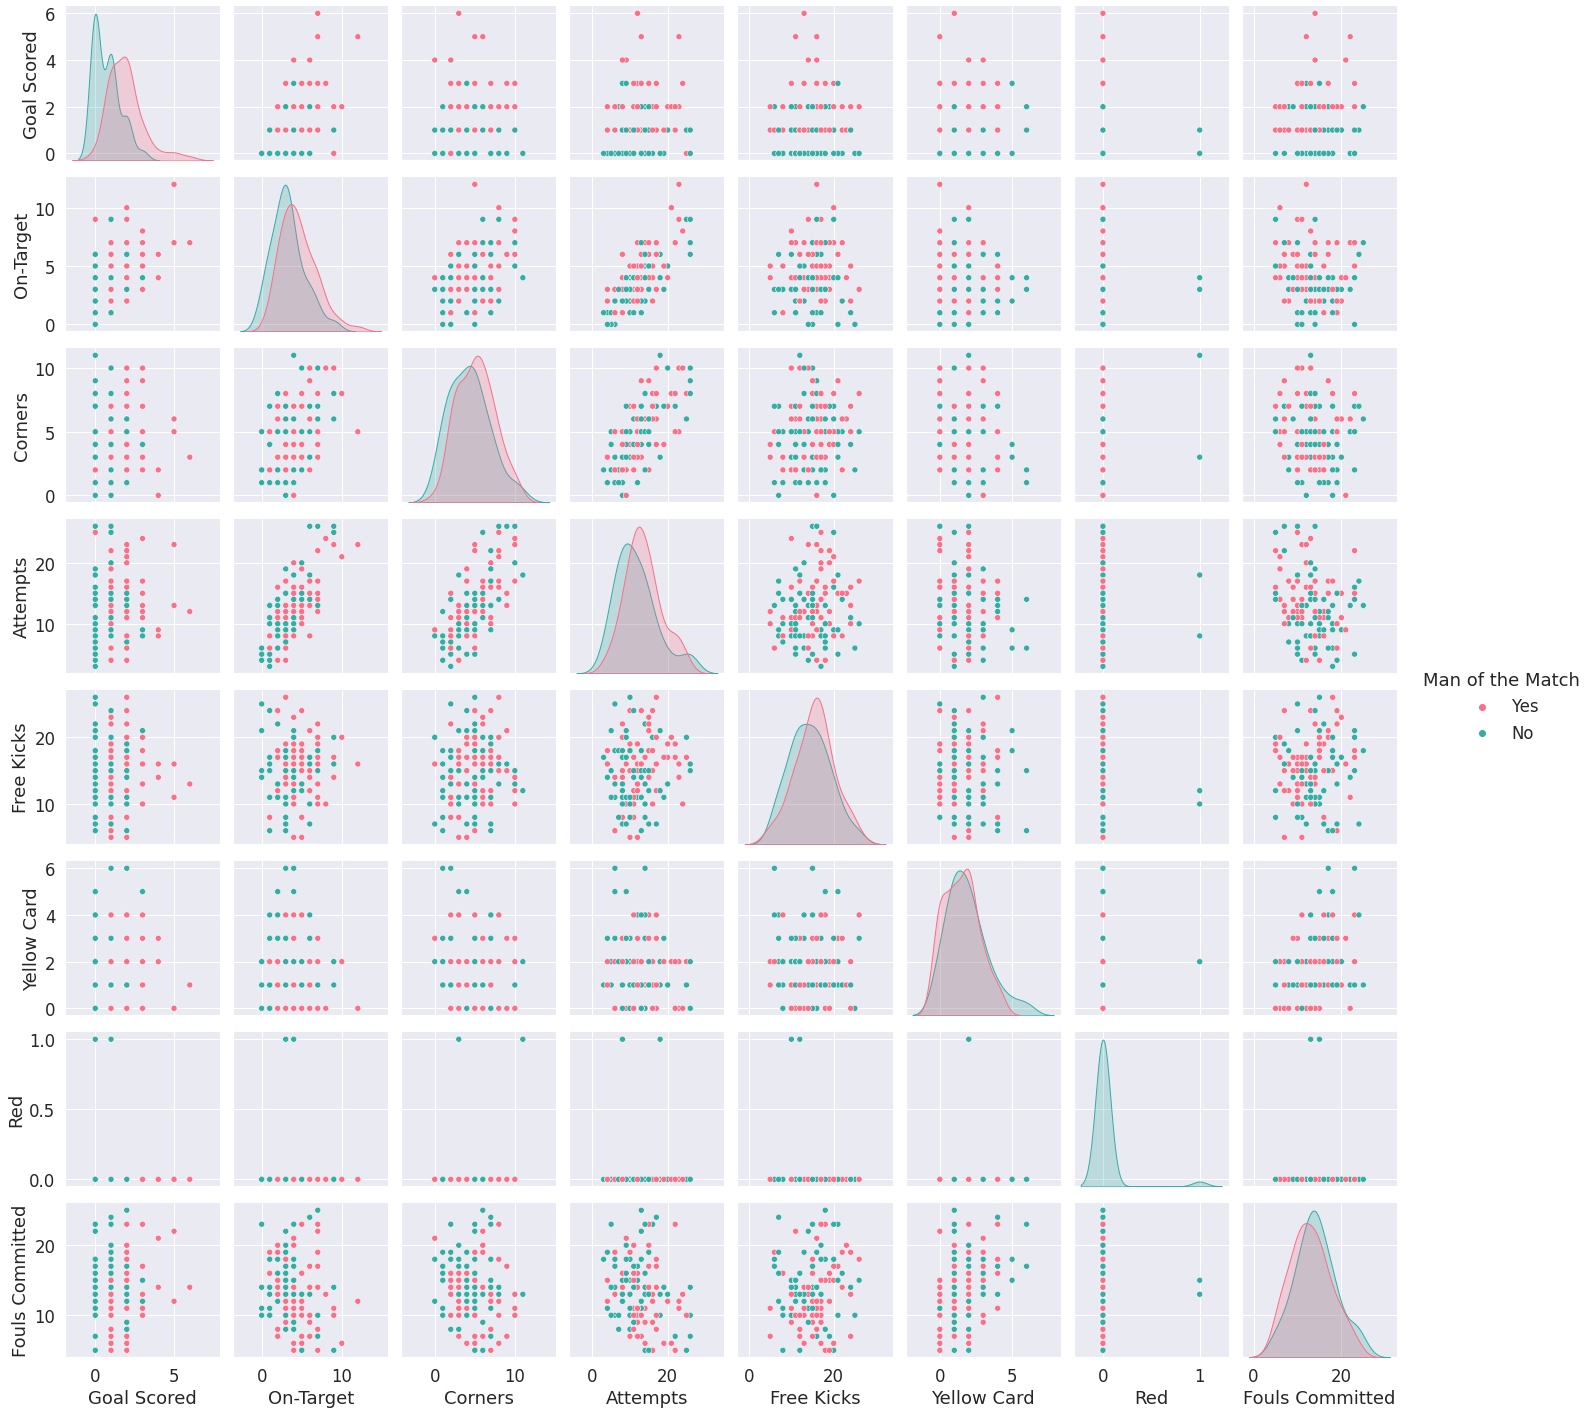

In [62]:
var1 = ['Goal Scored', 'On-Target', 'Corners', 'Attempts', 'Free Kicks', 'Yellow Card', 'Red', 'Fouls Committed']
var1.append('Man of the Match')
sns.pairplot(fifa2018_dataset[var1], hue = 'Man of the Match', palette="husl")
plt.show()

**Observations**

'Attempts' is linearly proportional to 'On-Target' and 'Corners'
'Corners' and 'On-Targets' are also linearly positively proportional

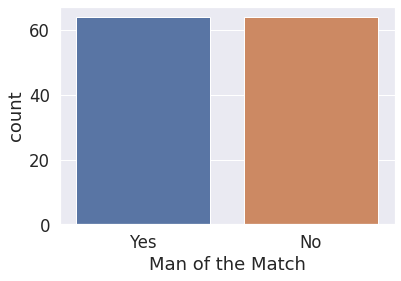

In [63]:

sns.countplot(x='Man of the Match',data = fifa2018_dataset)

<a id=section403></a>
### 4.3 Total goal attempts by teams

Text(0.5, 1.0, 'Total goal attempts by teams')

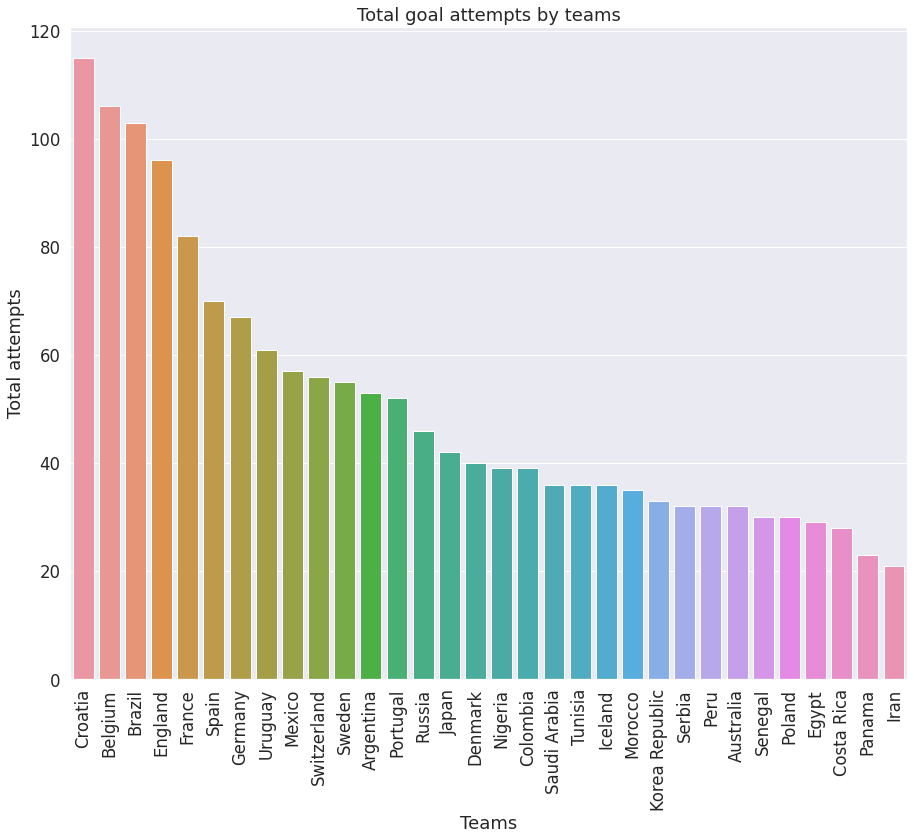

In [64]:
# Plotting total goal attempts by teams
attempts=fifa2018_dataset.groupby('Team')['Attempts'].sum().reset_index().sort_values(by=('Attempts'),ascending=False)

plt.figure(figsize = (15, 12), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Attempts", data=attempts)

plot1.set_xticklabels(attempts['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total attempts')
plot1.set_title('Total goal attempts by teams')

<a id=section404></a>
### 4.4 Total goal scored by teams

Text(0.5, 1.0, 'Total goals scored by teams')

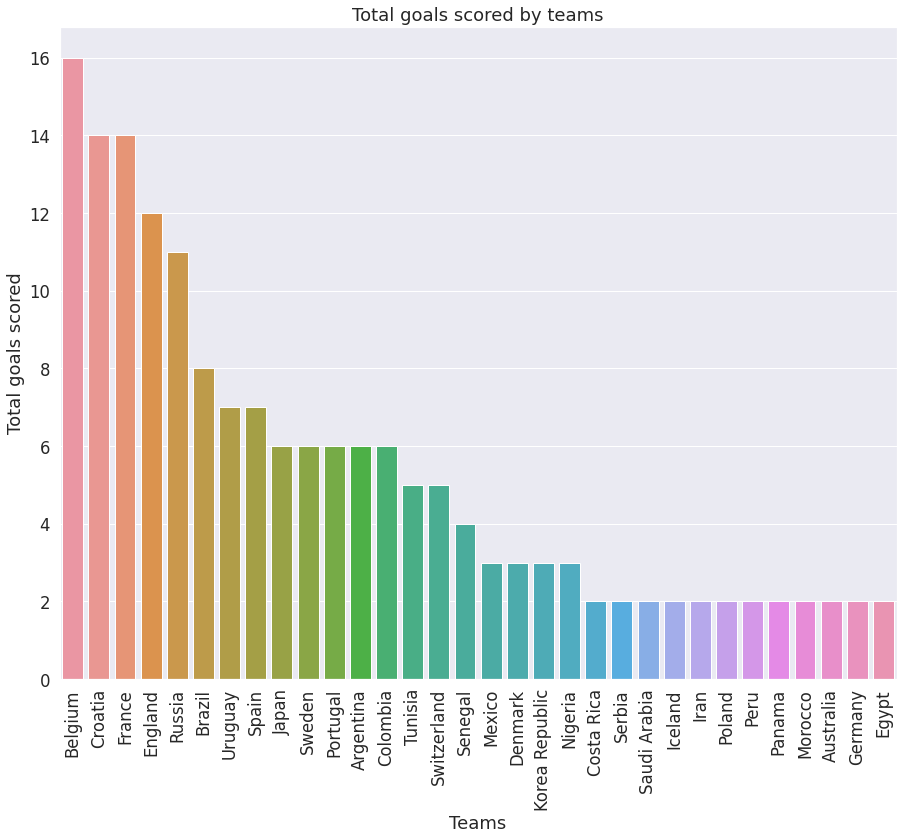

In [65]:
# Plotting total goals by teams
goals_by_team=fifa2018_dataset.groupby('Team')['Goal Scored'].sum().reset_index().sort_values(by=('Goal Scored'),ascending=False)

plt.figure(figsize = (15,12), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Goal Scored", data=goals_by_team)

plot1.set_xticklabels(goals_by_team['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total goals scored')
plot1.set_title('Total goals scored by teams')

<a id=section405></a>
### 4.5 Total goal conceded by teams

Text(0.5, 1.0, 'Total goals conceded')

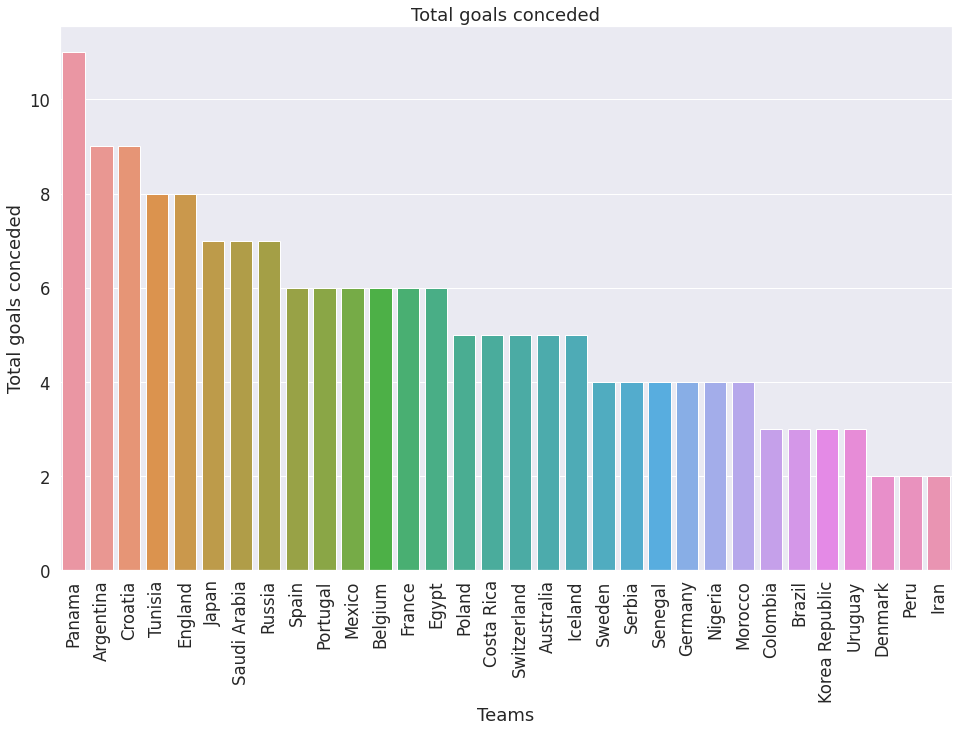

In [66]:
# Plot of total goals conceded by teams

# Most goals conceded by teams
goals_conceded = fifa2018_dataset.groupby('Opponent')['Goal Scored'].sum().reset_index().sort_values(by=('Goal Scored'), ascending=False)

plt.figure(figsize = (16, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Opponent", y="Goal Scored", data=goals_conceded)

plot1.set_xticklabels(goals_conceded['Opponent'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total goals conceded')
plot1.set_title('Total goals conceded')

<a id=section406></a>
### 4.6 Most saves by teams

Text(0.5, 1.0, 'Most Saves')

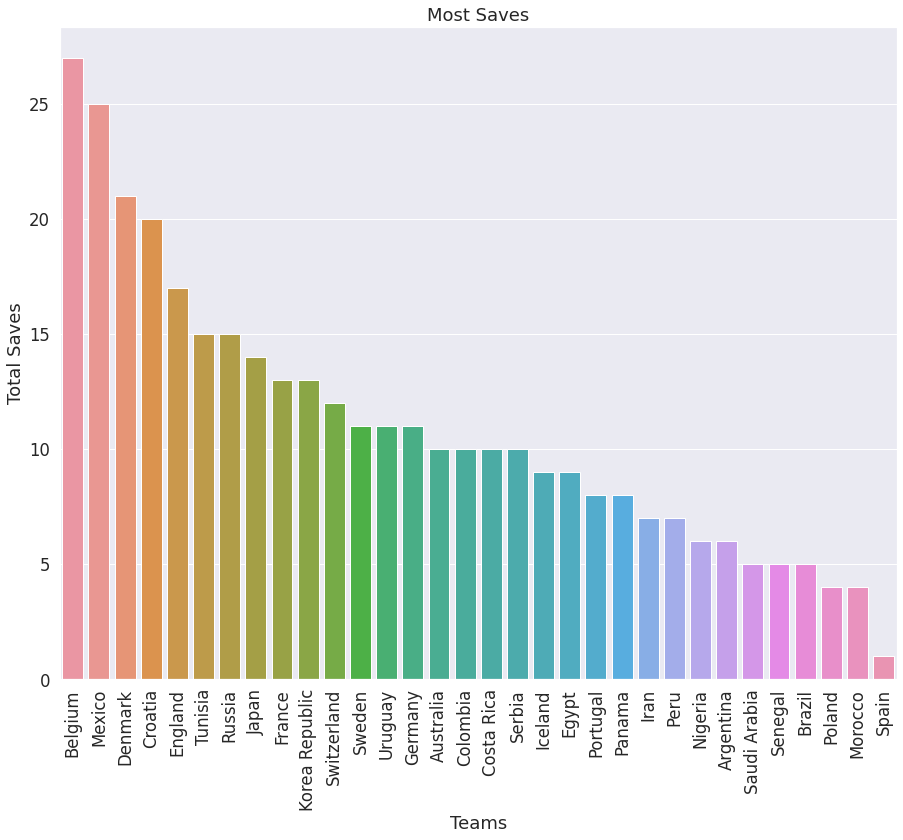

In [67]:
# Plotting Most saves by teams

saves=fifa2018_dataset.groupby('Team')['Saves'].sum().reset_index().sort_values(by=('Saves'),ascending=False)

plt.figure(figsize = (15,12), facecolor = None)
sns.set_style("darkgrid")
plot1 = sns.barplot(x="Team", y="Saves", data=saves)

plot1.set_xticklabels(saves['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total Saves')
plot1.set_title('Most Saves')

<a id=section407></a>
### 4.7 Most man of the Match

Text(0.5, 1.0, 'Most Man of the Match awards')

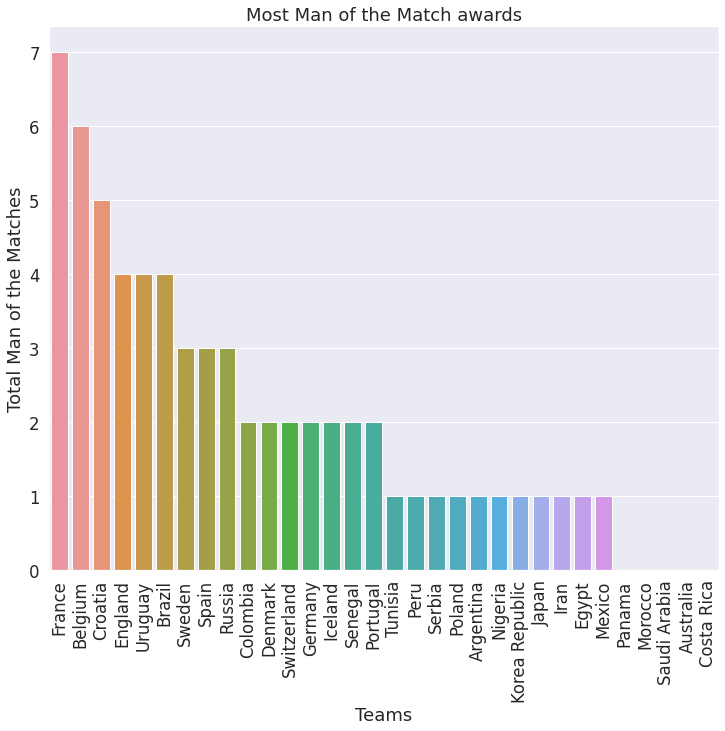

In [68]:

# Encoding the values for the column man of the Match
mom_1={'Man of the Match':{'Yes':1,'No':0}}
fifa2018_dataset.replace(mom_1,inplace=True)

# Converting column datatype to int
fifa2018_dataset['Man of the Match']=fifa2018_dataset['Man of the Match'].astype(int)

mom=fifa2018_dataset.groupby('Team')['Man of the Match'].sum().reset_index().sort_values(by=('Man of the Match'),ascending=False)

plt.figure(figsize = (12, 10), facecolor = None)
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Man of the Match", data=mom)

plot1.set_xticklabels(mom['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total Man of the Matches')
plot1.set_title('Most Man of the Match awards')

<a id=section408></a>
### 4.8 Total On-Target, Off-Target and Blocked attempts by teams

Text(0.5, 1.0, 'Total On-Target, Off-Target and Blocked attempts by teams')

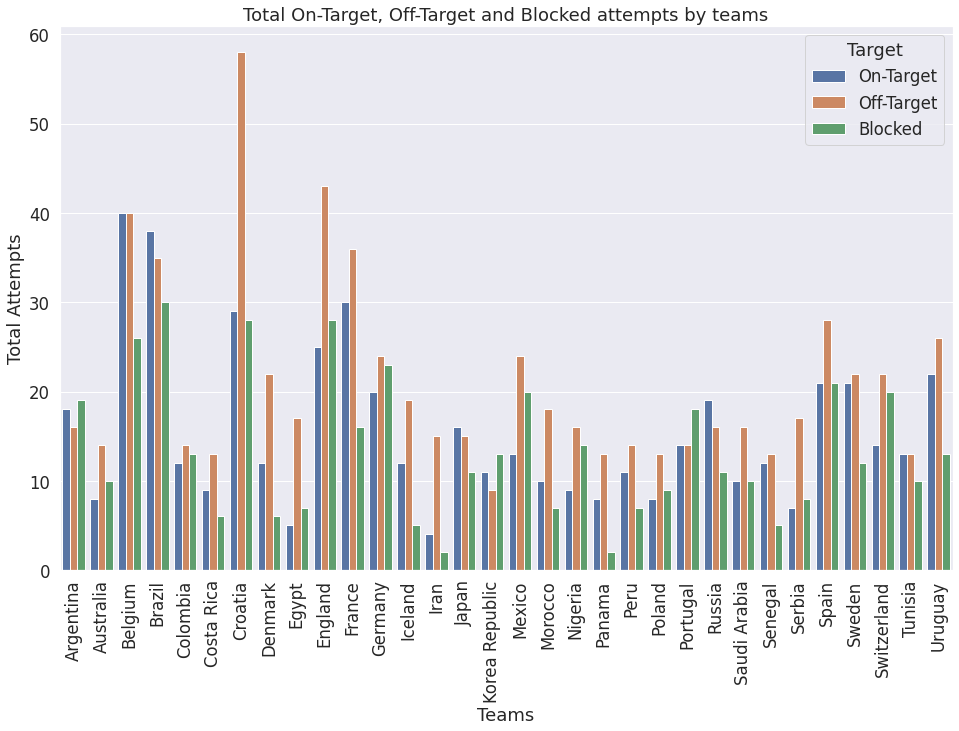

In [69]:

# Plot of Total On-target and Off-target and blocked attempts by teams

group_attempt = fifa2018_dataset.groupby('Team')['On-Target','Off-Target','Blocked'].sum().reset_index()

# Changing the dataframe for plotting
group_attempt_sorted = group_attempt.melt('Team', var_name='Target', value_name='Value')

# Plotting the new dataset created above
plt.figure(figsize = (16, 10), facecolor = None)

sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plot1 = sns.barplot(x="Team", y="Value", hue="Target", data=group_attempt_sorted)

#plot1.xaxis.set_major_locator(mticker.FixedLocator(group_attempt_sorted['Team']))
#plot1.set_xticklabels([label_format.format(x) for x in group_attempt_sorted['Team']], rotation=90, ha="center")
plot1.set_xticklabels(group_attempt_sorted['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total Attempts')
plot1.set_title('Total On-Target, Off-Target and Blocked attempts by teams')







<a id=section409></a>
### 4.9 Most saves by teams

Text(0.5, 1.0, 'Most Saves')

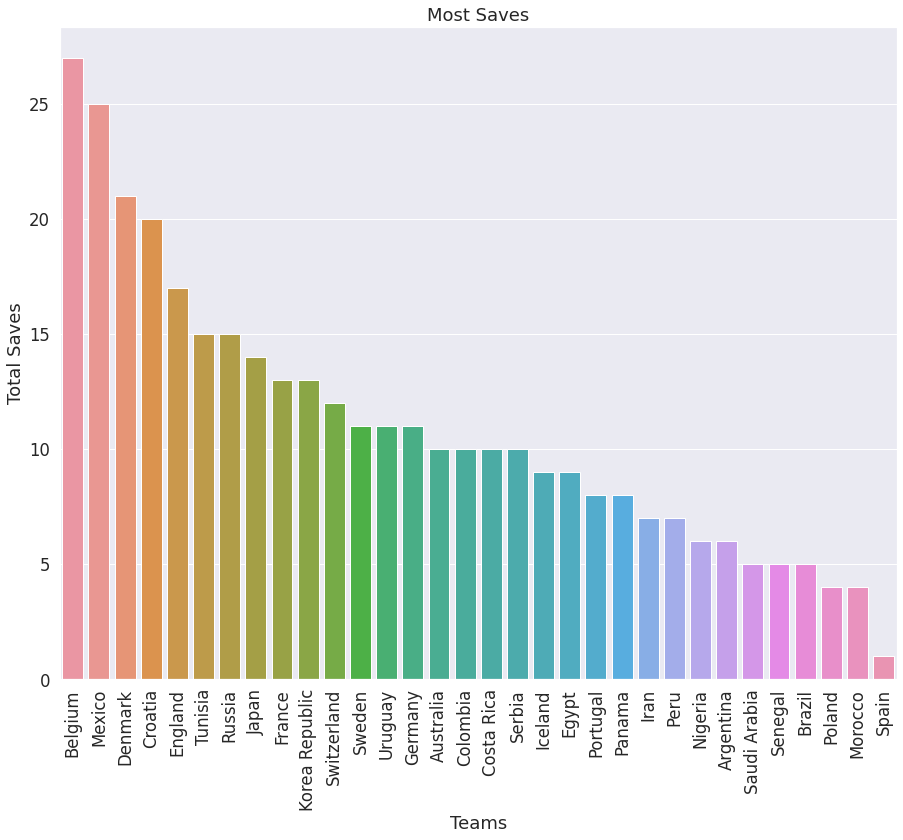

In [70]:
# Plotting Most saves by teams

saves=fifa2018_dataset.groupby('Team')['Saves'].sum().reset_index().sort_values(by=('Saves'),ascending=False)

plt.figure(figsize = (15,12), facecolor = None)
sns.set_style("darkgrid")
plot1 = sns.barplot(x="Team", y="Saves", data=saves)

plot1.set_xticklabels(saves['Team'], rotation=90, ha="center")
plot1.set(xlabel='Teams',ylabel='Total Saves')
plot1.set_title('Most Saves')

<a id=section5></a>
## 5. Skewness of numerical data

In [71]:
# Sewness of numerical data
skew_values = skew(fifa2018_dataset[numerical_features], nan_policy = 'omit')
pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)

,Features,Skewness degree
0,Goal Scored,1.132232
1,Ball Possession %,0.002204
2,Attempts,0.645828
3,On-Target,0.792629
4,Off-Target,0.279919
5,Blocked,0.942771
6,Corners,0.302464
7,Offsides,0.819830
8,Free Kicks,0.098830
9,Saves,0.934101


**Observations**

For normally distributed data, the skewness should be about 0. For unimodal continuous distributions, a skewness value > 0 means that there is more weight in the right tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to 0, statistically speaking.

Although data is not normally distribute, there are positive as well have negative skewedness

'Yellow & Red', 'Red' and 'Goals in PSO' are highly positively skewed.

<a id=section6></a>
## 6. Correlation between Featuures

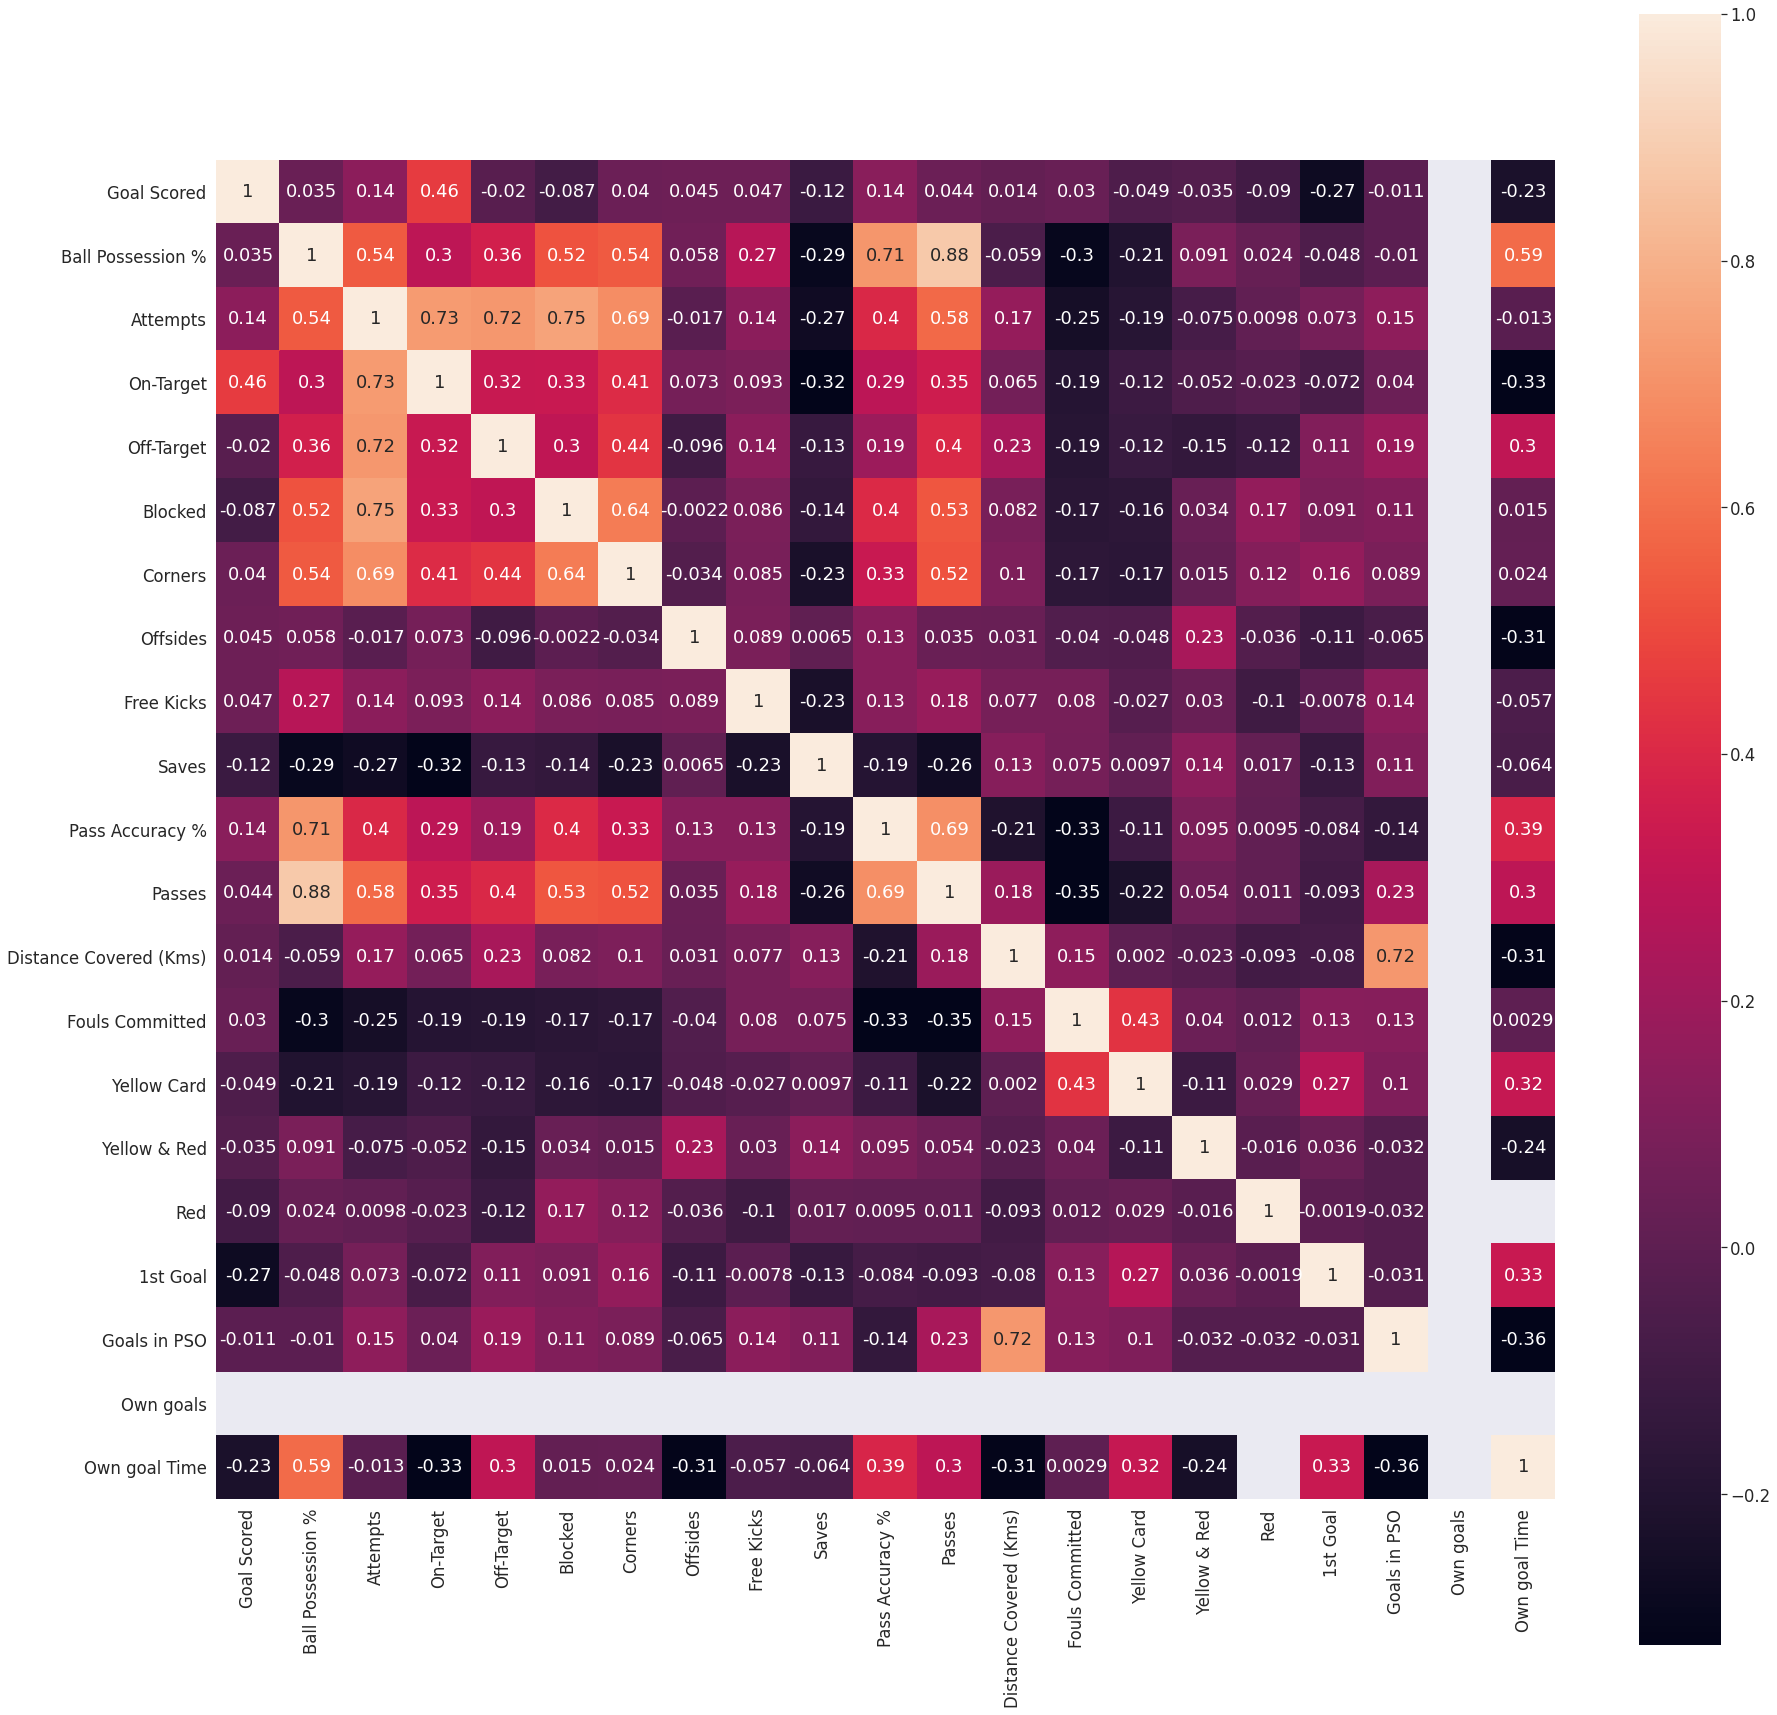

In [72]:
plt.figure(figsize=(30,30))
sns.heatmap(fifa2018_dataset[numerical_features].corr(), square=True, annot=True,robust=True, yticklabels=1)

So clearly Goal scored is highest correlated to target
Correlated columns needs to be removed to avoid multicollinearity. Let's use multicollinearity check

These features have least or no correlation with 'Man of the Match' ['Blocked', 'OffSides', 'Saves','Distance Covered (Kms)', 'Yellow & Red', '1st Goal', 'Goals in PSO']

These features will not have impact on our analysis and thus, holding them or retaining them is our choice

<a id=section601></a>
### 6.1 Correlation with highly correlated features

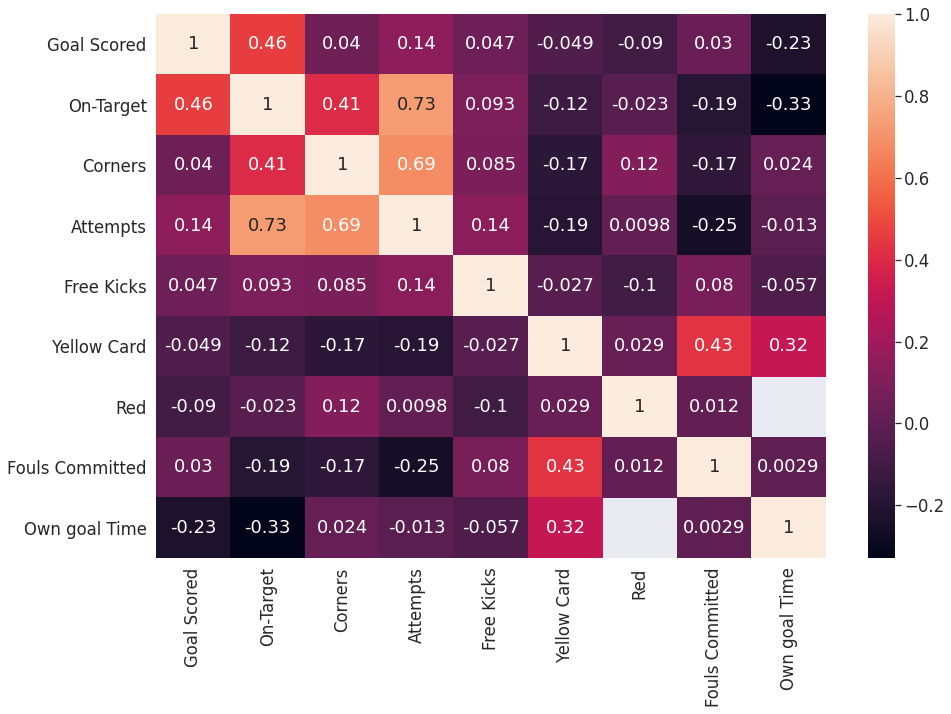

In [73]:
# Correlation with highly correlated features
var = ['Goal Scored', 'On-Target', 'Corners', 'Attempts', 'Free Kicks', 'Yellow Card', 'Red', 
       'Fouls Committed', 'Own goal Time']
plt.figure(figsize=(15,10))
sns.heatmap((fifa2018_dataset[var].corr()), annot=True)

<a id=section7></a>
## 7. Outlier Detection Using Box Plot

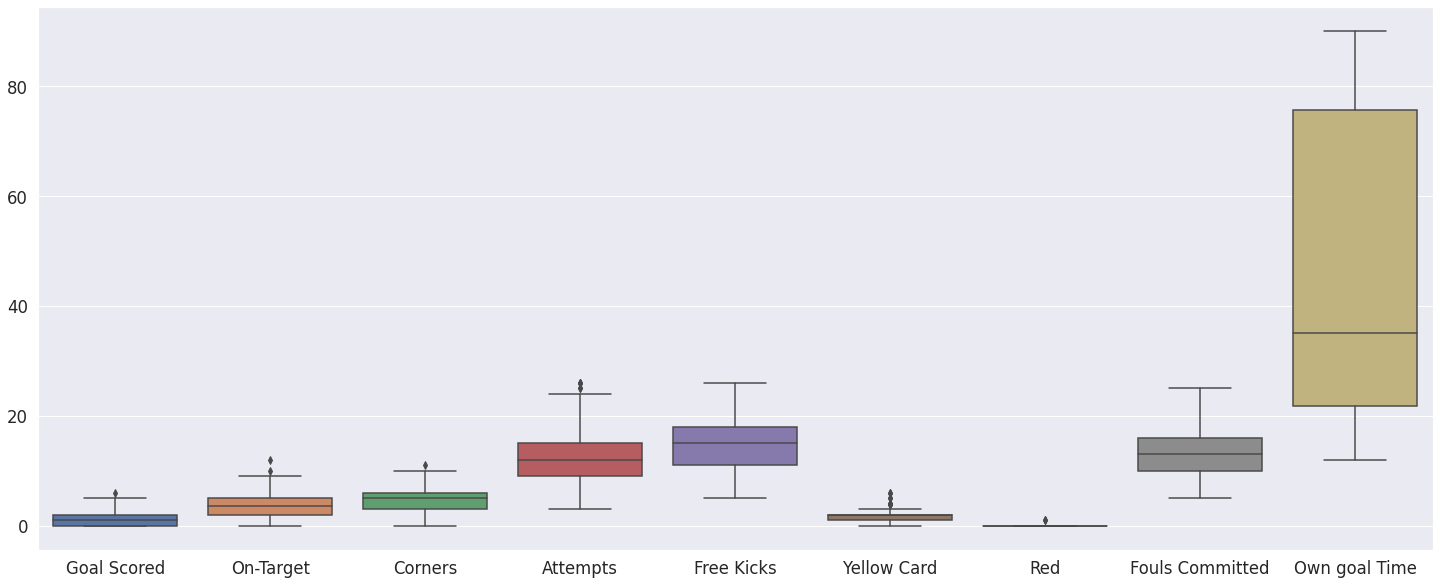

In [74]:
dummy_data = fifa2018_dataset[var]
plt.figure(figsize=(25,10))
sns.boxplot(data = dummy_data)
plt.show()

**Observations**

As per boxplot there are : outlier in Goal scored,in On-Target,in corners,in Attempts,in Yellow Card,in Red

<a id=section8></a>
## 8. Finding Missing Values

In [75]:
#Missing Values

missing_values = fifa2018_dataset.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(fifa2018_dataset))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
Own goal Time,116,90.6250
Own goals,116,90.6250
1st Goal,34,26.5625
Free Kicks,0,0.0000
Team,0,0.0000
Opponent,0,0.0000
Goal Scored,0,0.0000
Ball Possession %,0,0.0000
Attempts,0,0.0000
On-Target,0,0.0000


**Observations**

Since, the columns "own goals, own goal time, and 1st goal have 90% missing values. we will drop these columns"

<a id=section801></a>
### 8.1 Dropping Columns having Missing values 

In [76]:
fifa2018_dataset = fifa2018_dataset.drop(['Date', '1st Goal', 'Own goals', 'Own goal Time'], axis=1)

<a id=section9></a>
## 9. Model Creation to Predict Man of the Match

To apply any **machine learning algorithm** on your dataset, basically there are 4 steps:



*   Load the algorithm
*   Instantiate and Fit the model to the training dataset
*   Prediction on the test set
*   Calculating the accuracy of the model

<a id=section901></a>
### 9.1 Label Encoding Categorical Columns

In [77]:
from sklearn.preprocessing import LabelEncoder

lb_labels = LabelEncoder()
fifa2018_dataset["Man of the Match"] = lb_labels.fit_transform(fifa2018_dataset['Man of the Match'])
fifa2018_dataset["Round"] = lb_labels.fit_transform(fifa2018_dataset['Round'])
fifa2018_dataset["PSO"] = lb_labels.fit_transform(fifa2018_dataset['PSO'])

In [78]:
X = fifa2018_dataset.drop(['Man of the Match'], axis=1)
y = fifa2018_dataset['Man of the Match']

<a id=section903></a>
### 9.2 Finding Correlation for 'Man Of the Match' with other Columns

In [79]:
mom_corr = fifa2018_dataset.corr()['Man of the Match']
mom_corr = pd.DataFrame({'col':mom_corr.index, 'correlation':mom_corr.values})
mom_corr

,col,correlation
0,Goal Scored,0.522193
1,Ball Possession %,0.110393
2,Attempts,0.176425
3,On-Target,0.291346
4,Off-Target,0.152979
5,Blocked,-0.019582
6,Corners,0.173148
7,Offsides,0.026288
8,Free Kicks,0.119534
9,Saves,-0.034443


<a id=section903></a>
### 9.3 Removing columns with no correlation

In [80]:
no_corr_cols = mom_corr[(mom_corr.correlation < 0.1) & (mom_corr.correlation > -0.1)]
no_corr_cols = list(no_corr_cols.col)
no_corr_cols

['Blocked',
 'Offsides',
 'Saves',
 'Distance Covered (Kms)',
 'Yellow & Red',
 'Round',
 'PSO',
 'Goals in PSO']

In [81]:
# Droping columns with no correlation
X = X.drop(no_corr_cols, axis=1)

<a id=section904></a>
### 9.4 Split of Data to Train and Test

In [82]:
from sklearn.model_selection import train_test_split

indices = fifa2018_dataset.index.values.tolist()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, indices, test_size=0.1, random_state=42)
# test_size = 0.1 because not enough to have a good precision in the model

In [83]:
len(X_train)

115

In [84]:
len(X_test)

13

In [85]:
# Removing teams and getting test teams
X_train = X_train.drop(['Team', 'Opponent'], axis=1)
test_teams = X_test[['Team', 'Opponent']]
X_test = X_test.drop(['Team', 'Opponent'], axis=1)

In [86]:
results_mom = pd.DataFrame({
    "Team": test_teams["Team"],
    "Opponent": test_teams['Opponent'],
    "MoM_true": y_test
    })

<a id=section905></a>
### 9.5 Finding Precesion with KN-Classifier

In [87]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = range(2,10)
precision_knn = dict()

for i in neighbors:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results_mom['MoM_pred'] = y_pred
    precision = 100*round(clf.score(X_test, y_test),4)
    precision_knn[i] = precision
    print('Neighbors : ', i, '-> Precision : %s' %precision)
    
best_neighbors = max(precision_knn, key=precision_knn.get)

Neighbors :  2 -> Precision : 38.46
Neighbors :  3 -> Precision : 61.53999999999999
Neighbors :  4 -> Precision : 46.150000000000006
Neighbors :  5 -> Precision : 38.46
Neighbors :  6 -> Precision : 30.769999999999996
Neighbors :  7 -> Precision : 46.150000000000006
Neighbors :  8 -> Precision : 38.46
Neighbors :  9 -> Precision : 30.769999999999996


<a id=section906></a>
### 9.6 Finding Precesion with RandomForest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = range(2,15)
precision_rdf = dict()

for i in n_estimators:
    clf = RandomForestClassifier(n_estimators=i,random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results_mom['MoM_pred'] = y_pred
    precision = 100*round(clf.score(X_test, y_test),4)
    precision_rdf[i] = precision
    print('Estimators : ', i, '-> Precision : %s' %precision)

best_estimators = max(precision_rdf, key=precision_rdf.get)

Estimators :  2 -> Precision : 38.46
Estimators :  3 -> Precision : 61.53999999999999
Estimators :  4 -> Precision : 61.53999999999999
Estimators :  5 -> Precision : 61.53999999999999
Estimators :  6 -> Precision : 61.53999999999999
Estimators :  7 -> Precision : 69.23
Estimators :  8 -> Precision : 76.92
Estimators :  9 -> Precision : 76.92
Estimators :  10 -> Precision : 76.92
Estimators :  11 -> Precision : 69.23
Estimators :  12 -> Precision : 76.92
Estimators :  13 -> Precision : 76.92
Estimators :  14 -> Precision : 76.92


<a id=section907></a>
### 9.7 Finding Precesion with LogisticRegression

In [89]:
from sklearn.linear_model import LogisticRegression
log_results_mom = results_mom
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
log_results_mom['MoM_pred'] = y_pred
precision = 100*round(logreg.score(X_test, y_test),4)
print('Precision : %s' %precision)

Precision : 92.31


<a id=section908></a>
### 9.8 Model Comparison 

In [90]:
from sklearn.linear_model import LogisticRegression

classifiers = [KNeighborsClassifier(n_neighbors=best_neighbors), LogisticRegression(random_state=42), 
               RandomForestClassifier(n_estimators=best_estimators, random_state=42)]
names = ['KNN', 'Logistic', 'Random Forest']

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results_mom['MoM_pred'] = y_pred
    precision = 100*round(clf.score(X_test, y_test),4)
    print('Model : ', name, '-> Precision : %s' %precision)


Model :  KNN -> Precision : 61.53999999999999
Model :  Logistic -> Precision : 92.31
Model :  Random Forest -> Precision : 76.92


<a id=section909></a>
### 9.9 Logistic Model Prediction along with Original


In [91]:
log_results_mom

,Team,Opponent,MoM_true,MoM_pred
55,Mexico,Korea Republic,1,1
40,Denmark,Australia,1,0
19,Mexico,Germany,0,0
31,Senegal,Poland,1,0
98,Uruguay,Portugal,1,0
56,Germany,Sweden,1,1
69,Morocco,Spain,0,0
104,Brazil,Mexico,1,1
81,Germany,Korea Republic,0,0
26,Tunisia,England,0,0


<a id=section909></a>
### 9.10 Logistic Model Confusion Matrix

In [92]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))

print(confusion_matrix)

   0  1
0  5  0
1  3  5


In [93]:
confusion_matrix.index = ['Actual MOM False','Actual MOM True']
confusion_matrix.columns = ['Predicted MOM False','Predicted MOM True']
print(confusion_matrix)

                  Predicted MOM False  Predicted MOM True
Actual MOM False                    5                   0
Actual MOM True                     3                   5


In [94]:
from sklearn.metrics import accuracy_score
preds1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.45,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds1))

Accuracy score for test data is: 0.9230769230769231


**Observations**

This means 5 + 5 = 10 correct predictions & 3 + 0 = 3 false predictions.

**Adjusting Threshold** for predicting Man Of the Mathc or not.

In the section 4.7 we have used, .predict method for classification. This method takes 0.5 as the default threshhod for prediction.
Now, we are going to see the impact of changing threshold on the accuracy of our logistic regression model.
For this we are going to use .predict_proba method instead of using .predict method.
Setting the threshold to 0.75

In [95]:
from sklearn.metrics import accuracy_score
preds1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.75,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds1))

Accuracy score for test data is: 0.6923076923076923


The accuracy have been reduced significantly changing from 0.92 to 0.69. Hence, 0.75 is **not a good threshold** for our model.

Setting the threshold to __0.25__

In [96]:
from sklearn.metrics import accuracy_score
preds1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.25,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds1))

Accuracy score for test data is: 0.6923076923076923


The accuracy have been __reduced__, changing from __0.92 to 0.69__. Hence, 0.25 is also __not a good threshold__ for our model. <br/>
Later on we will see methods to identify the best threshold. 